In [1]:
import sys, os
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

os.chdir('test_data')
from ricepaper.reader import RiceBall
from ricepaper.dykes import DykeFarm

In [14]:
pile = RiceBall('settled_pile.OUT',radii={1:60,2:50,3:40},density={1:2500,2:2500,3:2500})

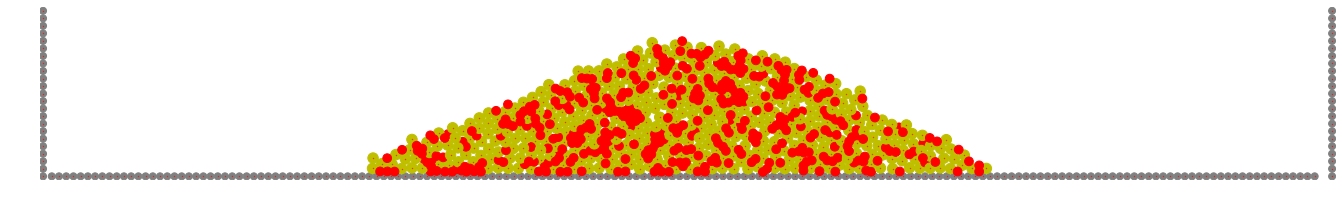

In [4]:
#plot!
pile.quickPlot()

In [15]:
#print particle bounds
pile.getBounds(dynamic=True)

(3822.76, 10990.6, 100.27799999999999, 1702.11)

In [16]:
#shape volcano using cutting lines
deleted = pile.cut(4500,35)
deleted += pile.cut(9500,-35)

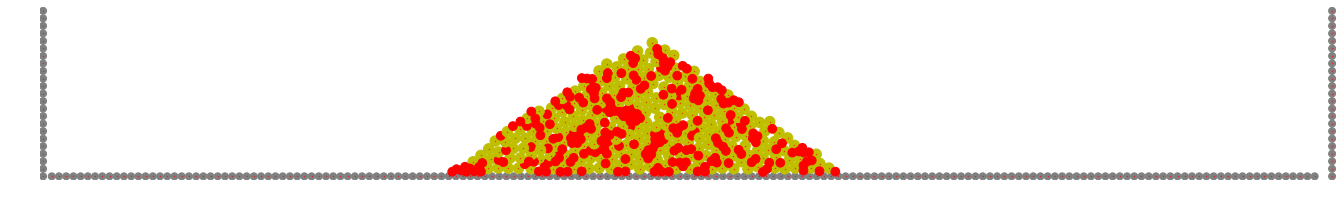

In [17]:
#plot!
pile.quickPlot()

In [19]:
#introduce dykes
meanx = 7000
stdvx = 1000

meand = 90
stdvd = 20

#insert dykes
dykes = []
farm = DykeFarm(pile,p_arrest=0.04)
for i in range(50):
    #sample random position and ori
    pos = np.random.normal(meanx,stdvx)
    dip = np.random.normal(meand,stdvd)
    if dip > 90: #map dips > 90 to negative dips
        dip = dip - 180
        
    #make dyke
    path, bonds = farm.dykeFromOri(pos,dip,useCost=False)
    dykes += path

In [ ]:
#plot
plt.figure(figsize=(18,5))
nx.draw(pile.G,pile.pos,node_size=10,node_color='grey',hold=True)
nx.draw(pile.G,pile.pos,nodelist=farm.upper,node_size=10,node_color='g',hold=True)
nx.draw(pile.G,pile.pos,nodelist=farm.lower,node_size=10,node_color='b',hold=True)
nx.draw(pile.G,pile.pos,nodelist=dykes,node_size=10,node_color='r',hold=True)
plt.show()

In [9]:
#delete balls from model
R.delBalls(deleted,model.pos)

NameError: name 'R' is not defined